# Workshop 2: Is it Melting?

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px; height: auto; margin: 0"\>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px; height: auto; margin: 0"\>
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.3. Wednesday, Sep 21, 2023.*

In this notebook you will fit a model to a time series of height observations of a point on a glacier, to assess whether it is melting. 

**Learning objectives:**
- apply least-squares (LS) and best linear unbiased (BLU) estimation
- evaluate the precision of the estimated parameters
- discuss the differences between least-squares and best linear unbiased estimation

You have 12 monthly measurements of the height of a point on a glacier. The measurements are obtained from a satellite laser altimeter. The observations are given in the code below.

We will fit a model assuming a linear trend (constant velocity) to account for the melting, plus an annual signal due to the seasonal impact on ice.

The precision (1 $\sigma$) of the first six observations is 0.7 meter, the last six observations have a precision of 2 meter due to a change in the settings of the instrument. All observations are mutually independent.

In [42]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# this will print all float arrays with 3 decimal places
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

## 1. Observation model

Times of observations, observed heights and number of observations are given. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
Fill in the correct $\mathrm{A}$-matrix (design matrix) and covariance matrix $\Sigma_Y$ (stochastic model) as a linear trend with an annual signal. See documentation on <a href="https://numpy.org/doc/stable/reference/generated/numpy.diagflat.html#numpy.diagflat" target="_blank">np.diagflat</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html" target="_blank">np.column_stack</a>.
</p>
</div>

In [43]:
t = np.arange(12)
y = [47.82, 45.20, 47.09, 47.49, 47.68, 47.34, 48.95, 49.34, 43.38, 42.33, 36.71, 36.47]
m = len(t)

A = np.column_stack((np.ones(m), t, np.cos((2*np.pi*t)/m)))
print(A)
diag_1 = [0.49, 0.49, 0.49,0.49,0.49,0.49]
diag_2 = [4,4,4,4,4,4]
Sigma_Y = np.diagflat([diag_1, diag_2])
print(Sigma_Y)

[[1.000 0.000 1.000]
 [1.000 1.000 0.866]
 [1.000 2.000 0.500]
 [1.000 3.000 0.000]
 [1.000 4.000 -0.500]
 [1.000 5.000 -0.866]
 [1.000 6.000 -1.000]
 [1.000 7.000 -0.866]
 [1.000 8.000 -0.500]
 [1.000 9.000 -0.000]
 [1.000 10.000 0.500]
 [1.000 11.000 0.866]]
[[0.490 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.490 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.490 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.490 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.490 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.490 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 0.

## 2. Least-squares and Best linear unbiased (BLU) estimation

The BLU estimator is a *linear* and *unbiased* estimator, which provides the *best* precision, where:

- linear estimation: $\hat{X}$ is a linear function of the observables $Y$,
- unbiased estimation: $\mathbb{E}(\hat{X})=\mathrm{x}$,
- best precision: sum of variances, $\sum_i \sigma_{\hat{x}_i}^2$, is minimized.

The solution $\hat{X}$ is obtained as:
$$
\hat{X} = \left(\mathrm{A}^T\Sigma_Y^{-1} \mathrm{A} \right)^{-1} \mathrm{A}^T\Sigma_Y^{-1}Y
$$
Note that here we are looking at the *estimator*, which is random, since it is expressed as a function of the observable vector $Y$. Once we have a realization $y$ of $Y$, the estimate $\hat{\mathrm{x}}$ can be computed.

It can be shown that the covariance matrix of $\hat{X}$ is given by:
$$
\Sigma_{\hat{X}} = \left(\mathrm{A}^T\Sigma_Y^{-1} \mathrm{A} \right)^{-1}
$$

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
Apply least-squares, and best linear unbiased estimation to estimate $\mathrm{x}$. The code cell below outlines how you should compute the inverse of $\Sigma_Y$, compute the leastsquares estimates then compute the best linear unbiased esimate.
</p>
</div>

In [44]:
inv_Sigma_Y = np.linalg.inv(Sigma_Y)
print(inv_Sigma_Y)

xhat_LS = np.linalg.inv(A.T  @ A) @ A.T @ y

xhat_BLU = np.linalg.inv(A.T @ inv_Sigma_Y @ A) @ A.T @ inv_Sigma_Y @ y

print('LS estimates in [m], [m/month], [m], resp.:\t', xhat_LS)
print('BLU estimates in [m], [m/month], [m], resp.:\t', xhat_BLU)

[[2.041 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 2.041 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 2.041 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 2.041 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 2.041 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 2.041 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.250 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.250 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.250 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.250 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.250 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.250]]
LS estimates in [m], [m/month], [m], resp.:	 [50.685 -1.037 -3.997]
BLU estimates in [m], [m/month]

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b>   
The covariance matrix of least-squares can be obtained as well by applying the covariance propagation law.
Calculate the covariance matrix and vector with standard deviations of both the least-squares and BLU estimates. What is the precision of the estimated parameters? The diagonal of a matrix can be extracted with <a href="https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html#numpy.diagonal" target="_blank">np.diagonal</a>.
</p>
</div>

In [45]:
Sigma_xhat_LS = np.linalg.inv(A.T @ A) @ A.T @ Sigma_Y @ A @ np.linalg.inv(A.T @ A)
print(Sigma_xhat_LS)
std_xhat_LS = np.sqrt(Sigma_xhat_LS)
print(std_xhat_LS)

Sigma_xhat_BLU = np.linalg.inv(A.T @ inv_Sigma_Y @ A) 
std_xhat_BLU = np.sqrt(Sigma_xhat_BLU)
print(f'Precision of LS  estimates in [m], [m/month], [m], resp.:', std_xhat_LS)
print(f'Precision of BLU estimates in [m], [m/month], [m], resp.:', std_xhat_BLU)

[[0.362 -0.068 -0.280]
 [-0.068 0.019 0.049]
 [-0.280 0.049 0.453]]
[[0.602 nan nan]
 [nan 0.138 0.221]
 [nan 0.221 0.673]]
Precision of LS  estimates in [m], [m/month], [m], resp.: [[0.602 nan nan]
 [nan 0.138 0.221]
 [nan 0.221 0.673]]
Precision of BLU estimates in [m], [m/month], [m], resp.: [[0.545 nan nan]
 [nan 0.137 0.206]
 [nan 0.206 0.498]]


C:\Users\gniko\AppData\Local\Temp\ipykernel_11920\182819981.py:3: RuntimeWarning: invalid value encountered in sqrt
  std_xhat_LS = np.sqrt(Sigma_xhat_LS)
C:\Users\gniko\AppData\Local\Temp\ipykernel_11920\182819981.py:7: RuntimeWarning: invalid value encountered in sqrt
  std_xhat_BLU = np.sqrt(Sigma_xhat_BLU)


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.3:</b>   
We are mostly interested in the melting rate. Discuss the estimated melting rate with respect to its precision.
</p>
</div>

**Write your answer in this Markdown cell.**

## 3. Residuals and plot with observations and fitted models.

Run the code below (no changes needed) to calculate the weighted squared norm of residuals with both estimation methods, and create plots of the observations and fitted models. 

Weighted squared norm of residuals with LS  estimation: 17.085
Weighted squared norm of residuals with BLU estimation: 10.605


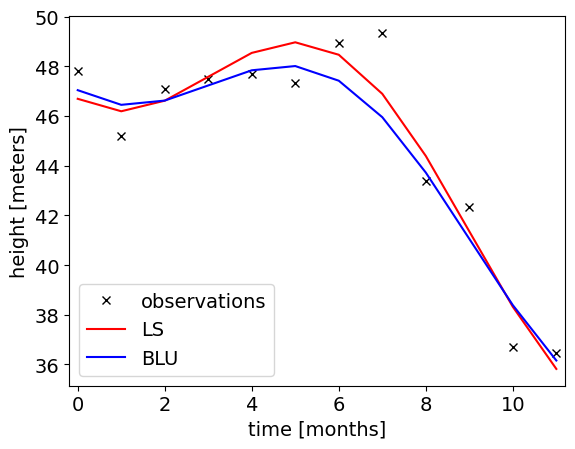

In [46]:
# Calculated the squared norm of residuals for the 3 models
eTe_LS = (y - A @ xhat_LS).T @ (y - A @ xhat_LS)
eTe_BLU = (y - A @ xhat_BLU).T @ inv_Sigma_Y @ (y - A @ xhat_BLU)

print(f'Weighted squared norm of residuals with LS  estimation: {eTe_LS:.3f}')
print(f'Weighted squared norm of residuals with BLU estimation: {eTe_BLU:.3f}')

plt.figure()
plt.rc('font', size=14)
plt.plot(t, y, 'kx', label='observations')
plt.plot(t, A @ xhat_LS, color='r', label='LS')
plt.plot(t, A @ xhat_BLU, color='b', label='BLU')
plt.xlim(-0.2, (m-1)+0.2)
plt.xlabel('time [months]')
plt.ylabel('height [meters]')
plt.legend(loc='best');

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
<ul>
    <li>Explain the difference between the fitted models.</li>
    <li>Can we see from this figure which model fits better (without information about the stochastic model)?</li>
</ul>
</p>
</div>

**Write your answer in this Markdown cell.**

## 4. Confidence bounds
In the code below you need to calculate the confidence bounds, e.g., ```CI_yhat_BLU``` is a vector with the values $k\cdot\sigma_{\hat{y}_i}$ for BLUE. This will then be used to plot the confidence intervals:
$$
\hat{y}_i \pm k\cdot\sigma_{\hat{y}_i}
$$

Recall that $k$ can be calculated from $P(Z < k) = 1-\frac{1}{2}\alpha$. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.1:</b> 
Complete the code below to calculate the 98% confidence intervals of both the observations $y$ <b>and</b> the adjusted observations $\hat{y}$.
    
Use <code>norm.ppf</code> to compute $k_{98}$. Also try different percentages.
</p>
</div>

In [52]:
yhat_LS = A @ xhat_LS
Sigma_Yhat_LS = A @ Sigma_xhat_LS @ A.T

yhat_BLU = A @ xhat_BLU
Sigma_Yhat_BLU = A @ Sigma_xhat_BLU @ A.T

alpha = 0.02
k98 = norm.ppf(1-alpha)
print(k98)

CI_y_LS = k98 # all st.devs. set to 1
CI_y_BLU = k98 * np.diag(np.sqrt(Sigma_Y))
CI_yhat_LS = np.diag(k98 * np.sqrt(Sigma_Yhat_LS))
CI_yhat_BLU = np.diag(k98 * np.sqrt(Sigma_Yhat_BLU))

2.0537489106318225


C:\Users\gniko\AppData\Local\Temp\ipykernel_11920\1522490006.py:13: RuntimeWarning: invalid value encountered in sqrt
  CI_yhat_LS = np.diag(k98 * np.sqrt(Sigma_Yhat_LS))
C:\Users\gniko\AppData\Local\Temp\ipykernel_11920\1522490006.py:14: RuntimeWarning: invalid value encountered in sqrt
  CI_yhat_BLU = np.diag(k98 * np.sqrt(Sigma_Yhat_BLU))


You can directly run the code below to create the plots.

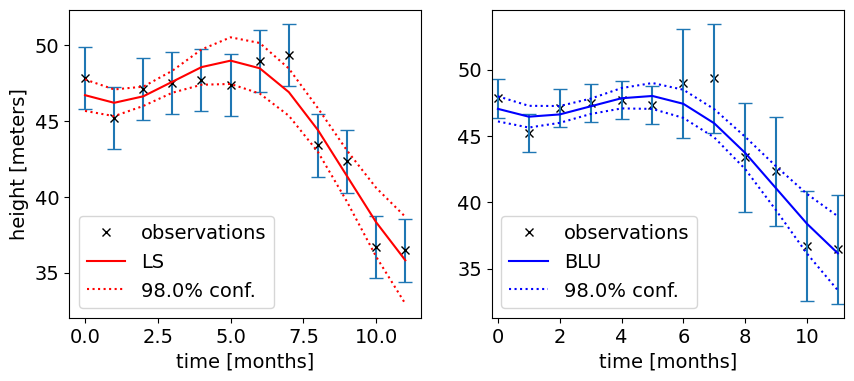

In [53]:
plt.figure(figsize = (10,4))
plt.rc('font', size=14)
plt.subplot(121)
plt.errorbar(t, y, yerr = CI_y_LS, fmt='', capsize=5, linestyle='')
plt.plot(t, y, 'kx', label='observations')
plt.plot(t, yhat_LS, color='r', label='LS')
plt.plot(t, yhat_LS + CI_yhat_LS, 'r:', label=f'{100*(1-alpha):.1f}% conf.')
plt.plot(t, yhat_LS - CI_yhat_LS, 'r:')
plt.xlabel('time [months]')
plt.ylabel('height [meters]')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(t, y, 'kx', label='observations')
plt.errorbar(t, y, yerr = CI_y_BLU, fmt='', capsize=5, linestyle='')
plt.plot(t, yhat_BLU, color='b', label='BLU')
plt.plot(t, yhat_BLU + CI_yhat_BLU, 'b:', label=f'{100*(1-alpha):.1f}% conf.')
plt.plot(t, yhat_BLU - CI_yhat_BLU, 'b:')
plt.xlim(-0.2, (m-1)+0.2)
plt.xlabel('time [months]')
plt.legend(loc='best');

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.2:</b> 
Discuss the shape of the confidence bounds. Do you think the model (linear trend + annual signal) is a good choice?
</p>
</div>

**Write your answer in this Markdown cell.**

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.3:</b> 
What is the BLU-estimated melting rate and the amplitude of the annual signal and their 98% confidence interval? Hint: extract the estimated values and standard deviations from <code>xhat_BLU</code> and <code>std_xhat_BLU</code>, respectively.
</p>
</div>

In [55]:
print(xhat_BLU)
print(std_xhat_BLU)

[50.313 -1.029 -3.277]
[[0.545 nan nan]
 [nan 0.137 0.206]
 [nan 0.206 0.498]]


In [63]:
rate = xhat_BLU[1]

CI_rate = k98 * np.diag(std_xhat_BLU)[1]

amplitude = xhat_BLU[2]
CI_amplitude = k98 * np.diag(std_xhat_BLU)[2]
print(std_xhat_BLU)
#print(CI_amplitude)

print(f'The melting rate is {rate:.3f} ± {CI_rate:.3f} m/month (98% confidence level)')
print(f'The melting rate is {amplitude:.3f} ± {CI_amplitude:.3f} m (98% confidence level)')

[[0.545 nan nan]
 [nan 0.137 0.206]
 [nan 0.206 0.498]]
The melting rate is -1.029 ± 0.280 m/month (98% confidence level)
The melting rate is -3.277 ± 1.022 m (98% confidence level)


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.4:</b> 
Can we conclude the glacier is melting due to climate change?
</p>
</div>

**Write your answer in this Markdown cell.**

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.